# XGBoost
XGBoost is a machine learning library that implements gradient boosting. 

In [1]:
from sklearn.datasets import load_boston
boston = load_boston()

In [2]:
import pandas as pd

data = pd.DataFrame(boston.data)
data.columns = boston.feature_names

In [3]:
data['PRICE'] = boston.target

In [4]:
import xgboost as xgb
import pandas as pd
import numpy as np

In [5]:
X, y = data.iloc[:,:-1], data.iloc[:,-1]
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: PRICE, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

xg_reg = xgb.XGBRegressor(
    n_estimators=1000, 
    max_depth=7, 
    eta=0.1, 
    subsample=0.7, 
    colsample_bytree=0.8
)
    
# Maximum depth of a tree. Increasing this value will make the model more complex and more likely to overfit. 0 indicates no limit on depth. Beware that XGBoost aggressively consumes memory when training a deep tree. exact tree method requires non-zero value.
# L1 regularization term on weights. Increasing this value will make model more conservative.

In [9]:
xg_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, enable_categorical=False,
             eta=0.1, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.100000001,
             max_delta_step=0, max_depth=7, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [10]:
preds = xg_reg.predict(X_test)

mae = mean_absolute_error(y_test, preds)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test, preds)

pd.DataFrame({
        'Param': ['MAE', 'MSE', 'RMSE', 'R2'], 
        'XGBoost': [mae, mse, rmse, r2_score]
})

,Param,XGBoost
0,MAE,2.265729
1,MSE,11.495042
2,RMSE,3.390434
3,R2,0.857784


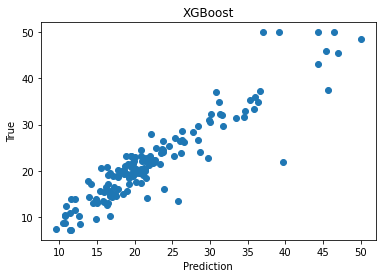

In [11]:
import matplotlib.pyplot as plt

plt.scatter(preds, y_test)
plt.title('XGBoost')
plt.xlabel("Prediction")
plt.ylabel("True")
plt.show()
